
# <font color=#770000>ICPE 639 Introduction to Machine Learning </font>

## ------ With Energy Applications

Some of the examples and exercises of this course are based on several books as well as open-access materials on machine learning, including [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)


<p> &#169; 2021: Xiaoning Qian </p>

[Homepage](http://xqian37.github.io/)

**<font color=blue>[Note]</font>** This is currently a work in progress, will be updated as the material is tested in the class room.

All material open source under a Creative Commons license and free for use in non-commercial applications.

Source material used under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

# Unsupervised Learning

Unsupervised learning aims at deriving patterns hidden in data, including feature extraction (such as dimension reduction), clustering, anomaly detection, etc. The difference from supervised learning we have covered so far is that we typically do not have "target output" in training. 

We will focus on dimension reduction and clustering methods here. 


# Dimension Reduction

Dimension reduction implies that we derive a smaller number of "aggregated" features given often high-dimensional input vectors. The transformation functions to derive aggregated features can be linear (for example, PCA) or nonlinear (for example, LLE). This section will cover the content listed below: 

- [1 Curse of Dimensionality](#1-The-Curse-of-Dimensionality)
- [2 Principal Component Analysis (PCA)](#2-Principal-Component-Analysis)
- [3 Non-negative Matrix Factorization](#3-Non-negative-Matrix-Factorization)
- [4 Locally Linear Embedding (LLE)](#4-Locally-Linear-Embedding)
- [5 Laplacian Eigenmaps](#5-Laplacian-Eigenmaps)
- [6 t-SNE](#6-t-SNE)
- [7 Hands-on Exercise](#7-Hands-on-Exercise)
- [Reference](#Reference) 





## 1 **The Curse of Dimensionality**

Many machine learning methods can break down in high dimensions, and this phenomenon is commonly referred to as the *"curse
of dimensionality"*. The reason for this phenomenon is shown in the following discussion.

Consider a p-dimensional unit hypercube $[0,1]^p$ whose volume is 1. For a given target point, the volume of the hypercubical neighborhood of this point with the edge length $r$ is $S = r^d$. Then if we uniformly sample $N$ observations from the unit hypercube, to include a fraction S of the observations in the hypercubical neighborhood of a target point, the expected edge length will be $e_p(r) = S^{1/p}$.
* When $p=10$ and $S = 0.1$, $e_{10}(r) \approx 0.80$. Recall that the entire range for each dimension is only 1, it means that to capture 10% of the data to form a local average, we must cover 80% of the range of each input variable. **Such neighborhoods are no longer “local.”**
* Another manifestation is that, when $p$ is big, the sampling density is proportional to $N^{1/p}$. If $N = 10$ represents a dense sample for a single input problem, then $N^{10} = 10^{10}$ is the sample size required for the same sampling density with 10 inputs. **Thus in high-dimensional settings, all feasible training samples sparsely populate the input space.**




## Example:

We build a simulaiton study to show the above discussion. 

1) For $p$ from 1 to 10, we random sample $N = 10$ observations uniformly from the p-dimensional unit hypercube $[0,1]^p$ respectively. For each observation, we calculate the distance from its nearest neighbor. The average distances of all $N = 10$ observations for different $p$ are shown in the plot below.

> We observe that when $N$ is fixed, the average distance to the nearest neighbor increases as $p$ increases. The points are not close to each other for a large $p$.

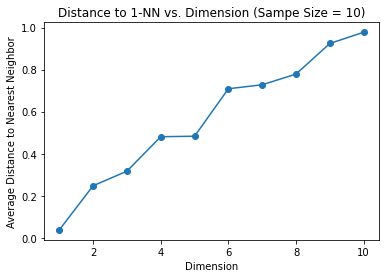

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

N = 10
ndist = np.zeros(10)
for p in range(10):
  X = np.random.uniform(low=0.0, high=1.0,size=[N,p+1])
  nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)  
  distances, indices = nbrs.kneighbors(X)
  ndist[p] = np.mean(distances[:,1])  # The first neighbor is the observation itself. The second neighbor is what we want.


plt.plot(range(1,11), ndist,'.-',markersize = 12)
plt.xlabel('Dimension')
plt.ylabel('Average Distance to Nearest Neighbor')
plt.title('Distance to 1-NN vs. Dimension (Sampe Size = 10)')

plt.show()




2) We now fix $p = 10$ and set $N$ as 10, 100, 1000, or 10000. The average distances to the nearest neighbor of all observations for different $N$ are shown in the plot below. 

We observe that when $N$ increases to 10000, the average distance for $p=10$ is around 0.4, which is still higher than the values of $p=1,2,3$ with $N = 10$. This shows that decreasing the number of features is more effective than increasing the number of samples to solve the curse of high dimensionality. 


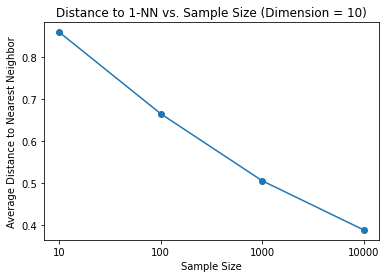

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # fix random seed

N = 10
p = 10
ndist2 = np.zeros(4)
for Np in range(4):
  X = np.random.uniform(low=0.0, high=1.0,size=[N**(Np+1),p])
  nbrs2 = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
  distances2, indices2 = nbrs2.kneighbors(X)
  ndist2[Np] = np.mean(distances2[:,1])


plt.plot(range(1,5), ndist2,'.-',markersize = 12)
plt.xticks(range(1,5), (10,100,1000,10000))
plt.xlabel('Sample Size')
plt.ylabel('Average Distance to Nearest Neighbor')
plt.title('Distance to 1-NN vs. Sample Size (Dimension = 10)')
plt.show()


---

## **Dimensionality Reduction**

To solve the curse of dimensionality, a common method is to generate a small number of constructed/selected features to replace the original features, which contain most information of the original features. This process is called dimensionality reduction. The space of the new features is also called the projection space. We introduce 5 commonly used dimensionality reduction methods. 

1. Principal Component Analysis (PCA)

2. Non-negative Matrix Factorization (NMF)

3. Locally Linear Embedding (LLE)

4. Laplacian Eigenmaps

5. T-SNE


**<font color=blue>[Note]</font>**: When prior knowledge is available, for example, in many time-series analysis applications including in the power/energy sector, Physically meaningful features can be directly computed. For example, as showcased in the following paper (based on cycle-to-cycle change of the battery discharge voltage curves): 

https://www.nature.com/articles/s41560-019-0356-8

## 2 Principal Component Analysis

## Methodology of Principal Component Analysis



**Principal Component Analysis (PCA)** identifies the linear combinations of input features that account for **the largest variance** in the data. These linear combinations are called the Principal Components (PCs). PCA is one of the most popular linear dimensionality reduction methods.

**Definition (Linear Dimensionality Reduction)** Give a $d$-dimensional feature vector $\mathbf{x} \in \mathbb{R}^{d}$ and a choice of dimensionality $r < d$. An linear transformation $f: \mathbb{R}^d \rightarrow \mathbb{R}^r$ can be represented by a transformation matrix $\mathbf{V} \in \mathbb{R}^{d\times r}$ that $\mathbf{y} = f(\mathbf{x}) =  \mathbf{V}^T\mathbf{x} $, where $\mathbf{y} \in \mathbb{R}^{r}$ is called  the transformed feature vector.

Denote the $N$ observations of $\mathbf{x}$ by $\mathbf{x}^1, \mathbf{x}^2, \dots, \mathbf{x}^N$, and $\mathbf{X} = (\mathbf{x}^1, \mathbf{x}^2, \dots, \mathbf{x}^N)^T \in \mathbb{R}^{N\times d}$ is the data matrix. Then the transformed data with linear transformation $f$ will be $\mathbf{Y} = \mathbf{X}\mathbf{V} \in \mathbb{R}^{N\times r}$.



### Basic math (linear algebra) 

To begin with, we consider to generate only one feature with $r=1$.
Then, $\mathbf{V}$ becomes a transformation vector (denoted by $\mathbf{v}$), and the transformed $N \times 1$ data is $\mathbf{y}_1 = \mathbf{X}\mathbf{v}$. 



The first step of PCA is to center each column 
of $\mathbf{X}$ to make sure that $\mathbf{1}^T\mathbf{X} = \sum_{i=1}^N (\mathbf{x}^{i})^T = \mathbf{0}^T$. As a result, the sample mean of the transformed feature is also 0 since $\frac{1}{N}\mathbf{1}^T\mathbf{y}_1 = \frac{1}{N}\mathbf{1}^T\mathbf{X}\mathbf{v} = \frac{1}{N}\mathbf{0}^T\mathbf{v} = 0$. 



PCA then finds $\mathbf{v}$ which maximizes the sample variance of the transformed feature:

$\max_{\mathbf{v}} \mathbf{y}_1^T\mathbf{y}_1 = \max_{\mathbf{v}} \mathbf{v}^T\mathbf{X}^T\mathbf{X}\mathbf{v}$ subject to $\mathbf{v}^T\mathbf{v} = 1$,

where $\mathbf{v}^T\mathbf{v} = 1$ is used to control the scale of $\mathbf{v}$. The solution of the above optimization problem is denoted as $\mathbf{v}_1$. Then the transformed feature $\mathbf{y}_1 = \mathbf{X}\mathbf{v}_1$ is called the first PC of $\mathbf{X}$.



### When $r>1$

Now we consider the case when $r>1$. After $\mathbf{v}_1$ and $\mathbf{y}_1$ are obtained, we can find the next PC (the next transformed feature) $\mathbf{y}_2 = \mathbf{X}\mathbf{v}_2$ where $\mathbf{v}_2$ is the solution of:

> $\max_{\mathbf{v}} \mathbf{v}^T\mathbf{X}^T\mathbf{X}\mathbf{v}$ subject to $\mathbf{v}^T\mathbf{v} = 1$ and $\mathbf{v}^T\mathbf{v}_1 = 0$.

where $\mathbf{v}^T\mathbf{v}_1 = 0$ requires that the new $\mathbf{v}$ should be orthogonal to $\mathbf{v}_1$. 



In the similar way, we can solve $\mathbf{v}_3,\dots,\mathbf{v}_r$ sequantially with the additional constraint that when solving $\mathbf{v}_i$ ($i = 3,\dots r$), $\mathbf{v}_i$ should be orthogonal to $\mathbf{v}_1,\dots,\mathbf{v}_{i-1}$. Then the transformation matrix is $\mathbf{V} = (\mathbf{v}_1, \mathbf{v}_2,\dots, \mathbf{v}_r$). The transformed data is $\mathbf{Y} = \mathbf{X}\mathbf{V}$ which contains the first $r$ PCs of the original data. At most, we can generate $r = \text{rank}(\mathbf{X})$ PCs.

### PCA is related to the **singular value decomposition (SVD)**.

The SVD is a matrix factorization/decomposition method. Specifically, the SVD of an $ N\times p$ real matrix $\mathbf{X}$ is a factorization of the form:

> $\mathbf{X} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T$.

* $\mathbf{U} \in \mathbb{R}^{N \times N}$ and $\mathbf{V} \in \mathbb{R}^{p \times p}$ are orthogonal matrices that $\mathbf{U}^T\mathbf{U} = \mathbf{U}\mathbf{U}^T = \mathbf{I}$ and $\mathbf{V}^T\mathbf{V} = \mathbf{V}\mathbf{V}^T = \mathbf{I}$
* $\boldsymbol{\Sigma} \in \mathbb{R}^{N \times p}$ is a rectangular diagonal matrix with non-negative real numbers on the diagonal. The diagonal entries $\sigma_i = \Sigma_{ii}$ are known as the singular values of $\mathbf{X}$. 
* The columns of $\mathbf{U}$ and the columns of $\mathbf{V}$ are called the left-singular vectors and right-singular vectors of $\mathbf{X}$, respectively.


### Properties:

(1) **The solution of $\mathbf{v}_i$ when constructing the $i$th PC is the same as the right-singular vector of $\mathbf{X}$ corresponding to the $i$th largest singular value.** As a result, PCA can be solved by the SVD.



(2) The sample variance of the $i$th PC is $\mathbf{y}_i^T\mathbf{y}_i = \sigma_i^2$. Then $\frac{\sigma_i^2}{\sum_{i=1}^N \sigma_i^2} = \frac{ \mathbf{y}_i^T\mathbf{y}_i}{\sum_{i=1}^N\mathbf{y}_i^T\mathbf{y}_i} = \frac{\mathbf{y}_i^T\mathbf{y}}{\sum_{i=1}^N\mathbf{x}_i^T\mathbf{x}_i}$ is called the percentage of variance explained by the $i$th PC. $\mathbf{x}_i$ here represents the centered $\mathbf{x}_i$. $\frac{\sum_{i=1}^r\sigma_i^2}{\sum_{i=1}^N \sigma_i^2}$ is called the percentage of variance explained by the first $r$ PCs.



(3) For any two PCs $\mathbf{y}_i$ and $\mathbf{y}_j$ with $i \neq j$, $\mathbf{y}_i^T\mathbf{y}_j = 0$. This means that every two PCs are orthogonal to each other.

> Proof: $\mathbf{y}_i = \mathbf{X}\mathbf{v}_i = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T\mathbf{v}_i = \mathbf{U}\boldsymbol{\Sigma} \mathbf{e}_i^T = \sigma_{i}\mathbf{u}_i$, where $\mathbf{e}_i$ is the basis vector with the $i$th entry equal to 1 and the other entries equal to 0. Then $\mathbf{y}_i^T\mathbf{y}_j = \sigma_{i}\sigma_{j}\mathbf{u}_i^T\mathbf{u}_j = 0$.



### Factor Analysis

Assume that each observation $\mathbf{x}_i \in \mathbb{R}^d$ is generated by $r$ dimensional latent variable $\mathbf{h}_i \in \mathbb{R}^r$:

> $\mathbf{x}_i = \mathbf{W}\mathbf{h}_i + \boldsymbol{\mu} + \boldsymbol{\epsilon}$.

$\mathbf{h}_i$ is called called “latent” because it is unobserved. $\boldsymbol{\mu}$ is some offset vector. $\boldsymbol{\epsilon}$ is considered a noise term distributed according to a Gaussian with mean 0 and covariance $\Psi$. In the matrix form, we have:

> $\mathbf{X} = \mathbf{W}\mathbf{H} + \mathbf{U} + \mathbf{E}$.
where $\mathbf{H} = (\mathbf{h}_1,\dots, \mathbf{h}_N)^T$.

The goal of factor analysis is to find $\mathbf{H}$.


#### Relationship between factor analysis and PCA.

* Under some distribution assumptions, factor analysis becomes the probabilistic model of PCA.
* Factor analysis can produce similar components to PCA. However, factor analysis is more flexible than PCA. For example, in factor analysis, these components do not need to be orthogonal.


### Example 1: Simulation

The reference of examples 1 and 3: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html#Example:-Eigenfaces.

We first use a toy example to show that PCs account for the most variance of the original data, and different PCs are orthogonal.

We consider 200 two-dimensional points generated by the following code:

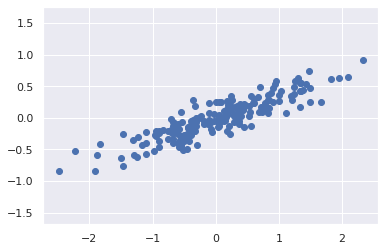

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

The rank of this data matrix $\mathbf{X}$ is 2, and we now generate the two PCs of $\mathbf{X}$.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The "components_" attribute of "pca" includes $\mathbf{v}_1,\dots, \mathbf{v}_r$. The "explained_variance_" attribute of "pca" includes $\sigma_1^2,\dots,\sigma_r^2$.

We can observe that the first PC and the second PC are orthogonal:

In [ ]:
X_r = pca.transform(X)  ## the transform data of the original data
sum(X_r[:,0] * X_r[:,1]) 

1.1331213745080504e-14

Now let's visualize "components_" and "explained_variance_" as vectors over the input data, using the "components_" to define the direction of the vector and the "explained_variance_" to define the squared-length of the vector:

[-0.94446029 -0.32862557]
[-0.32862557  0.94446029]
[ 0.03351168 -0.00408072]
[-0.10050192  0.38107044]
[-2.4406829  -0.86497833]
0.0


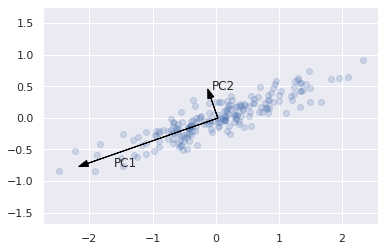

In [ ]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
(length1, vector1), (length2, vector2) = zip(pca.explained_variance_, pca.components_)
print(vector1)
print(vector2)
print(pca.mean_)
print(np.sqrt(length2) * vector2*3 + pca.mean_)
print(np.sqrt(length1) * vector1*3 + pca.mean_)

print(sum(vector1 * vector2))

plt.arrow(pca.mean_[0], pca.mean_[1], np.sqrt(length1) * vector1[0]*2.5, np.sqrt(length1) * vector1[1]*2.5, color = "black", head_width = 0.1)
plt.arrow(pca.mean_[0], pca.mean_[1], np.sqrt(length2) * vector2[0]*2.5, np.sqrt(length2) * vector2[1]*2.5, color = "black", head_width = 0.1)
## we "*2.5" to make the line more appreant.

plt.annotate("PC1", np.sqrt(length1) * vector1*2 + pca.mean_- [0,0.2])
plt.annotate("PC2", np.sqrt(length2) * vector2*2 + pca.mean_+ [0,0.2])

plt.axis('equal');
plt.show();

These vectors represent the principal axes of the data. The length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

### Example 2: Iris dataset

The Iris dataset in sklearn.datasets represents 3 kinds of Iris flowers (Setosa, Versicolour, and Virginica) with 4 attributes: sepal length, sepal width, petal length, and petal width. Here we plot different observations on the first 2 principal components. The color of each point in the plot reflects its kind.

<Figure size 432x288 with 0 Axes>

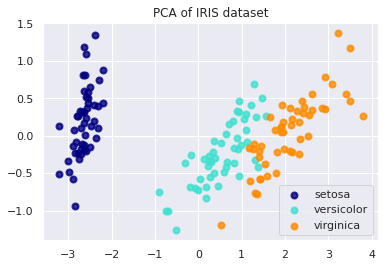

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data # 4 columns, each column for one feature.
y = iris.target
target_names = iris.target_names

## run PCA with 2 components
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()


### Example 3: Labeled Faces (*Eigenface*)

The Wild dataset includes several thousand collated photos of various public figures, and we use the Labeled Faces figures as an example.


In [ ]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


We first take a look at some figures.

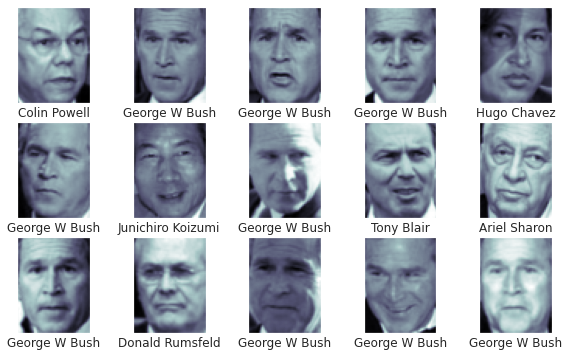

In [ ]:
fig, ax = plt.subplots(3, 5,figsize=(10,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])


Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use PCA to extract 150 fundamental components.

Because this is a large dataset, we will use **RandomizedPCA** (svd_solver='randomized')—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). 


Note that the default selection of "svd_solver" is 'auto'. When the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled automatically for this default selection. (For more information, see: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='randomized')
pca.fit(faces.data)


PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces"). As you can see in this figure, they are as creepy as they sound:

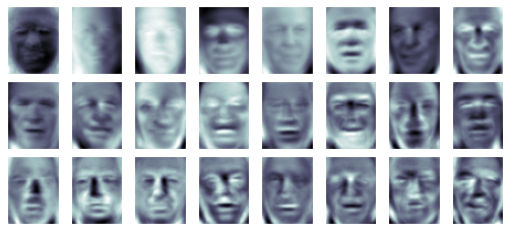

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few **eigenfaces** (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. 



Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving. We see that these 100 components account for 91.55% of the variance. That would lead us to believe that using these 100 components, we would recover most of the essential characteristics of the data.

0.9155197

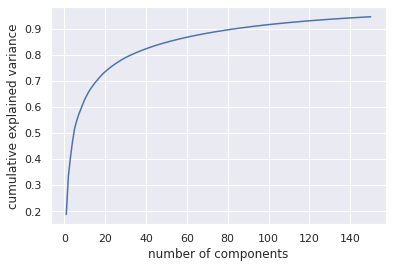

In [ ]:
plt.plot(range(1,151), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
np.cumsum(pca.explained_variance_ratio_)[99]

## 3 Non-negative Matrix Factorization



### Math formulation for Non-negative Matrix Factorization (NMF)

In practise, researchers may hope that the new constructed features are non-negative.

NMF is an alternative approach to matrix decomposition which assumes that all entries of the decomposed matrix are non-negative:

> $\mathbf{X} = \mathbf{W}\mathbf{H}$

where all entries in $\mathbf{W} \in {\mathbb{R}^+}^{N \times r}$ and $\mathbf{H} \in {\mathbb{R}^+}^{r \times d}$ are non-negative. 

However, there may not be $\mathbf{W}$ and $\mathbf{H}$ that make "=" hold exactly. As a result, the goal of NMF is to find the non-negative matrices $\mathbf{W}$ and $\mathbf{H}$ that minimize the difference between $\mathbf{X}$ and  $\mathbf{W}\mathbf{H}$. And $\mathbf{W}$ can be used as the new low-dimensional feature matrix.


To solve $\mathbf{W}$ and $\mathbf{H}$, we first construct a distance function between $\mathbf{X}$ and $\mathbf{W}\mathbf{H}$. For any two matrices $\mathbf{A}$ and $\mathbf{B}$ with the same dimension, the squared Frobenius norm is defined as:

> $\text{dist}(\mathbf{A}, \mathbf{B}) = ||\mathbf{A}- \mathbf{B}||^2_F = \sum_{i,j} (A_{ij} - B_{ij})^2$.

$\text{dist}(\mathbf{A}, \mathbf{B}) = 0$ if and only if $\mathbf{A} = \mathbf{B}$. As a result, we can use $||\mathbf{X} - \mathbf{W}\mathbf{H}||_F^2$ as a loss function and solve $\mathbf{W}$ and $\mathbf{H}$ via minimizaing $\text{dist}(\mathbf{A}, \mathbf{B})$. 



### NMF formulation

In practise, people construct the optimization problem for NMF:

> $\min_{\mathbf{W},\mathbf{H}}  \frac{1}{2}||\mathbf{X} - \mathbf{W}\mathbf{H}||_F^2 + P(\mathbf{W},\mathbf{H})$ suject to $W_{ij} \geq 0, H_{ij} \geq 0$.


$P(\mathbf{W},\mathbf{H})$ denotes a penalty function on $\mathbf{W}$ and $\mathbf{H}$ to regularize the NMF model. The usual selection of $P(\mathbf{W},\mathbf{H})$ is the elastive net penalty on $\mathbf{W}$ and $\mathbf{H}$ seperately:

> $P(\mathbf{W},\mathbf{H}) = P_{\text{elastic_net}}(\mathbf{W}) + P_{\text{elastic_net}}(\mathbf{H}) \\ =\alpha\rho||\mathbf{W}||_1  + \frac{\alpha(1-\rho)}{2}||\mathbf{W}||_F^2 + \alpha\rho||\mathbf{H}||_1+ \frac{\alpha(1-\rho)}{2}||\mathbf{H}||_F^2$,

where $\alpha \geq 0$ and $\rho \in [0,1]$ are two tuning parameters. $\alpha$ reflect the strength of regularization, and $\rho$ is an allocation parameter for $||\cdot||_1$ and $||\cdot||_F^2/2$.




**Properties of the penalty** $P_{\text{elastic_net}}(\mathbf{W})$:
1.  $||\mathbf{W}||_1$ requires sparsity on the entries of $\mathbf{W}$. Some entries of $\mathbf{W}$ will be estimated as 0. 
2.  $||\mathbf{W}||_F^2$ could reduce the variance of estimator and avoid the overfitting of the model.
3. A combination of $||\mathbf{W}||_1$ and $||\mathbf{W}||_F^2$ also avoids that too many entries of $\mathbf{W}$ are estimated as 0.


### Example: Topic extraction

This dataset includes $N$ documents. People assume that there are $r$ latent topics among the documents and for each topic. Each document is expected to be given a non-negative score on each topic that shows the level of its relevance to the topic.

To solve this problem, we can use the NMF method. First, we construct a document-feature matrix as $\mathbf{X} \in \mathbb{R}^{N\times p}$. The features of each document are generated by the tf-idf method. Each feature respects a word, and the value of this feature for a document is intended to reflect how important a word is to a document among this document collection. Then, we decompose $\mathbf{X}$ into two non-negative score matrices $\mathbf{W}$ and $\mathbf{H}$. $\mathbf{W} \in \mathbb{R}^{N\times r}$ contains the score of each document on each topic, and $\mathbf{H} \in \mathbb{R}^{r\times p}$ contains the score of each word on each topic.

Reference: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

The detailed steps are shown below:

**Step 1** Load data and generate the tf-idf features for each document. We only use the first 2000 documents for example. For the tf-idf features, we set the max number of words considered as 1000.


In [ ]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000 # The number of documents we 
n_features = 1000 # the max number of tf-idf features generated


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples] ## Only use the first 2000 samples.
print("done in %0.3fs." % (time() - t0)) #

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Show names of 10 features for example.
tfidf_vectorizer.get_feature_names()[101:110]

Loading dataset...
done in 12.077s.
Extracting tf-idf features for NMF...
done in 0.406s.


['apply',
 'appreciated',
 'approach',
 'appropriate',
 'apr',
 'april',
 'archive',
 'area',
 'areas']

We can see that each feature represents a word.

**Step 2** Build the NMF model on the tf-idf data with $r =10$.

In [ ]:
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))

n_top_words = 20

t0 = time()
nmf = NMF(n_components=10, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.624s.


**Step 3** To visualize the results of NMF. For each topic, we use $\mathbf{H}$ to show the top 10 words that have the largest score of this topic.

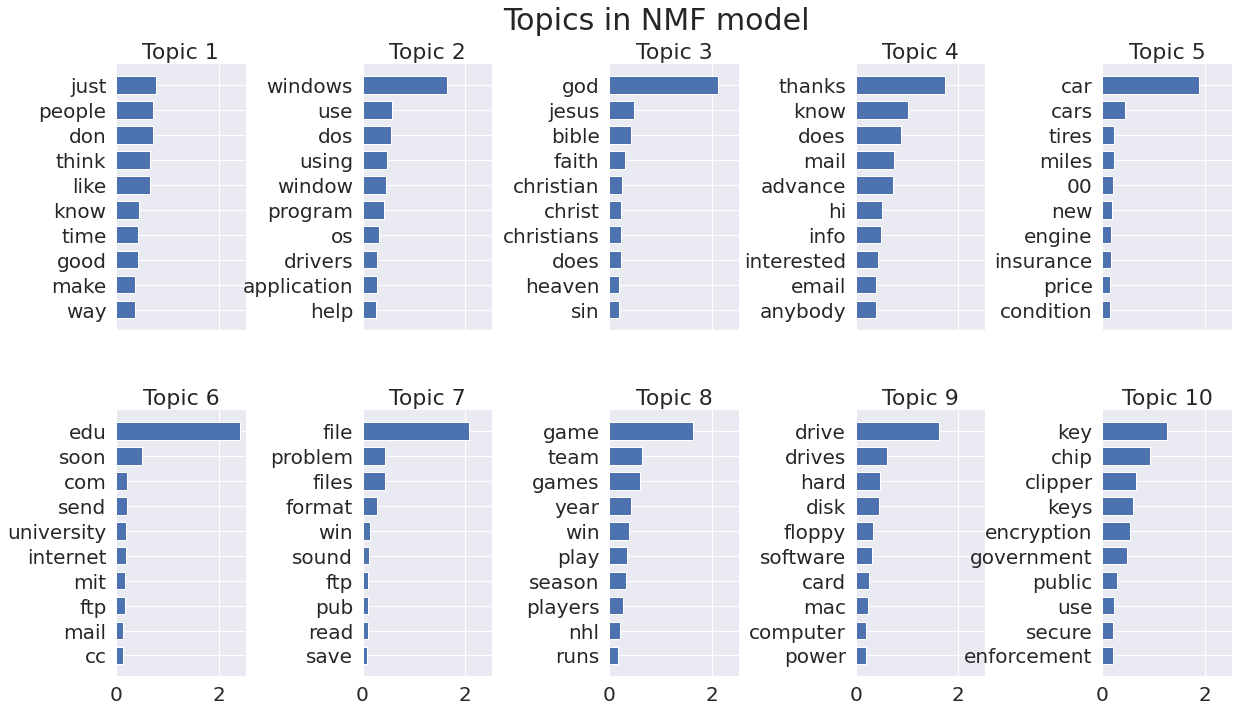

In [ ]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 22})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=30)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words = 10, title = 'Topics in NMF model')

## Limitation of the linear dimensionality reduction

We use the following example to show the limitation of the linear dimensionality reduction:

The Swiss Roll data includes three features, which is usually generated by

> $x = \phi cos(\phi)$  
> $y = \phi csin(\phi)$  
> $z = \psi$  

Each point in the swiss roll data can be represented by two features $(\phi,\psi)$. We construct a Swiss Roll dataset with 3000 points and plot it below. The shape of the Swiss Roll data looks like a swiss roll in 3D scatter plot. The color of a point shows its $\phi$.



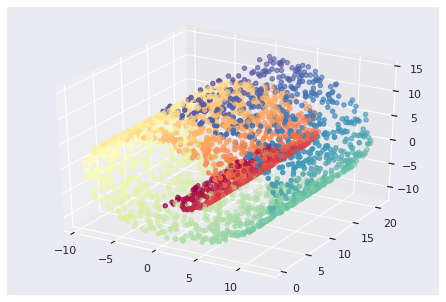

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(0) # fix random seed

# Generate a Swiss Roll with 3000 samples
X, color = datasets.make_swiss_roll(n_samples=3000) 

# Plot the Swiss Roll
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
plt.show()


Suppose that in the Swiss Roll data, $\phi$ is the most important feature in machine learning tasks. For example, points with more similar $\phi$ are more likely to come from the same group in a classifciation or clustering problem, or a response variable is highly linearly correlated with $\phi$ in a regression problem. Then we hope that we could recover $\phi$ by dimensionality reduction methods. Since we know that the relationship between the oriignal features and $\phi$ are not linear, the linear dimensionality recution methods such as PCA does not work.


For example, we construct the first 2 PCs from the Swiss Roll dataset.

Text(0.5, 1.0, 'Projected data')

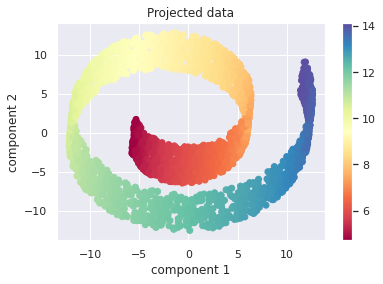

In [ ]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
Y_projected = pca.fit_transform(X)

plt.scatter(Y_projected[:, 0], Y_projected[:, 1],
            c=color, cmap=plt.cm.Spectral)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.title('Projected data')

We can see that PCA still keeps the global shape of the Swiss Roll dataset and cannot discover $\phi$ (without preserving the distances on the manifold). As a result, we now introduce three non-linear dimensionality reduction methods that focus more on the local information of data than the global information of data.



## 4 Locally Linear Embedding

### Basic math for Locally Linear Embedding (LLE)

Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves the **local relationship** within local neighborhoods. It assumes that the local neighborhood relationship of low-dimensional projections should be similar to those of the original observations:


Use $\mathbf{y}^{1},\dots, \mathbf{y}^{N}$ to denote the lower dimensional projection of the original observations $\mathbf{x}^{1},\dots, \mathbf{x}^{N}$. There are two main steps of LLE. 

(1) Learn the local neighborhood relationship of the original observations and find the reconstruction weight matrix $\mathbf{W}$.

* LLE first seeks the set of the $K$ nearest neighbors for each original observation $\mathbf{x}^{i}$, denoted by $\mathcal{N}_K^i$. 

* Then for each observation $\mathbf{x}^{i}$, it solves
> $\min_{w_{ij} \text{ for } j\in \mathcal{N}_K^i }||\mathbf{x}^{i} - \sum_{j \in \mathcal{N}_K^i}w_{ij}\mathbf{x}^{j}||_2^2$.

* Collect $w_{ij}$ for all observations together and make the reconstruction weight matrix $\mathbf{W}$. The $(i,j)$ entry of $\mathbf{W}$ is $w_{ij}$ for $j\in \mathcal{N}_K^i$. Otherwise, the $(i,j)$ entry of $\mathbf{W}$ is equal to 0.

(2) Generate low-dimensional projections using $\mathbf{W}$.



### Basics of LLE

LLE assumes that the local neighborhood relationship of $\mathbf{y}^{1},\dots, \mathbf{y}^{N}$ should be similar to those of $\mathbf{x}^{1},\dots, \mathbf{x}^{N}$ that for each $i$:

> $\mathbf{y}^{i} \approx \sum_{j \in \mathcal{N}_K^i}w_{ij}\mathbf{y}^{j}$

Then, LLE solves $\mathbf{y}^{1},\dots, \mathbf{y}^{N}$ by minimizing the sum of loss between $\mathbf{y}^{i}$ and $\sum_{j \in \mathcal{N}_K^i}w_{ij}\mathbf{y}^{j}$:

> $\min_{\mathbf{y}^{1},\dots, \mathbf{y}^{N}}  \sum_{i=1}^N||\mathbf{y}^{i} - \sum_{j \in \mathcal{N}_K^i}w_{ij}\mathbf{y}^{j} ||_2^2$.


The final coordinates of $\mathbf{y}_i$'s are the bottom nonzero eigenvectors of the resulting matrix by expanding the above objective function into the quadratic form of $\mathbf{y}_i$'s (by padding zeros in $\mathbf{W}$ other than K-nearest-neighbor entries. )




### Derivation details

Let $r$ be the dimension of embedding coordinates, i.e., $\mathbf{y}_i\in\mathbb{R}^r$. The objective function can be written as: 

> $\Phi(\mathbf{Y}) = \sum_{i=1}^N||\mathbf{y}^{i} - \sum_{j \in \mathcal{N}_K^i}w_{ij}\mathbf{y}^{j} ||_2^2 = \|\mathbf{Y}_{N\times r} - \mathbf{W}_{N\times N}\mathbf{Y}_{N\times r}\|_F^2 = \text{Tr}\left(\mathbf{Y}^T(\mathbf{I}-\mathbf{W})^T(\mathbf{I}-\mathbf{W})\mathbf{Y}\right),$ 

where $\mathbf{Y} = (\mathbf{y}_1,...,\mathbf{y}_N)^T$. This expression is similar as the quadratic form that we have maximized when doing PCA. Essentially, the minimizer of the objective function (subject to some additional constraints to ensure the uniqueness of the solution) is the bottom $r$ nonzero eigenvectors of the matrix $(\mathbf{I}-\mathbf{W})^T(\mathbf{I}-\mathbf{W})$.



### **Example: Swiss Roll (continued)**

We now use LLE to construct a 2-dimensional projection of the Swiss Roll dataset generated above. We can see that the first dimension is highly related to $\phi$ with an absolute value of the Pearson correlation 0.993.


[[1.         0.99174953]
 [0.99174953 1.        ]]


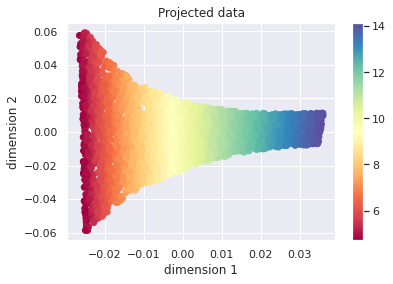

In [ ]:
from sklearn import manifold

LLE_projected, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)

plt.scatter(LLE_projected[:, 0], LLE_projected[:, 1],
            c=color, cmap=plt.cm.Spectral)
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.colorbar();
plt.title('Projected data')


print(np.corrcoef(LLE_projected[:, 0], color))


## 5 Laplacian Eigenmaps


### Basic math for Laplacian Eigenmaps

The Laplacian Eigenmaps method also focuses on preserving the local relationship among the samples. It assumes that if two observations are close in the original feature space, then they should also be close in the projection space.


The first step of Laplacian Eigenmaps is to construct a graph structure $\mathcal{G} = (\mathcal{V}, \mathcal{E},\mathbf{W})$, which reflects the local neighborhood relations between observations. $w_{ij}$ in $\mathbf{W}$ shows the closeness between observations $i$ and $j$ in the original feature space. The higher $w_{ij}$ is, the closer observation $\mathbf{x}^i$ and $\mathbf{x}^j$ are. $\mathcal{G}$ can be constructed in several ways. One popular selection is the $K$-nearest neighborhood graph. Another strategy is to use the Gaussian kernel similarity function to construct $\mathcal{G}$.


Then the Laplacian Eigenmaps method assumes that for observation $i$ and $j$ with large $w_{ij}$, after transformation, $\text{dist}(\mathbf{y}^i,\mathbf{y}^j) = ||\mathbf{y}^i - \mathbf{y}^j||_2^2$ should be small. Thus, $\mathbf{y}^1,\dots,\mathbf{y}^N$ are solved by solving the following optimization problem:

> $\min_{\mathbf{Y}} \sum_{i,j} w_{ij}||\mathbf{y}^i - \mathbf{y}^j||_2^2$.




### Why "Laplacian" Eigenmaps?

$$\sum_{i,j} w_{ij}||\mathbf{y}^i - \mathbf{y}^j||_2^2 \equiv \mathbf{Y}^T (\mathbf{D} - \mathbf{W})\mathbf{Y} = \mathbf{Y}^T \mathbf{L}\mathbf{Y},$$
where $\mathbf{D}$ is the **degree** matrix ($d_{ii} = \sum_j w_{ij}$) and the **graph Laplacian** is defined as $\mathbf{L}=\mathbf{D} - \mathbf{W}$. 

**Spectral Clustering**

Spectral clustering is a clustering method based on Laplacian Eigenmaps. After the transformed data $\mathbf{y}^1,\dots,\mathbf{y}^N$, are constructed by Laplacian Eigenmaps, spectral clustering applies a clustering method (usually K-means) on them to achieve sample clustering.


### UMAP

UMAP can be considered as one extension from LLE and Laplacian Eigenmap, which constructs a symmetric k-nn graph with different edge weights: 
https://arxiv.org/pdf/1802.03426.pdf

https://pair-code.github.io/understanding-umap/

You can test the code if you are interested. 

### Example: Segmenting the picture of Greek coins in regions
Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_coin_segmentation.html#sphx-glr-auto-examples-cluster-plot-coin-segmentation-py

In this example, we have a picture of greek coins and want to break this image into multiple partly-homogeneous regions. First, we load the data and resize it to 20% of the original size to speed up the processing applying a Gaussian filter for smoothing prior to down-scaling reduces aliasing artifacts.


In [ ]:
import time

import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import skimage
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

rescale_params = {}

# load the coins as a numpy array
orig_coins = coins()

# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect",
                         **rescale_params)
rescaled_coins.shape

(61, 77)

Then we generate a graph from the image. Each voxel in the image is treated as a vertex in the graph, and there are 61*77 = 4697 vertices.  Any two adjacent voxels are connected and form an edge in the graph. The weight of an edge in the graph is calculated as $exp(-10 d_{ij}/\text{sd}(d_{ij})) + 0.1^{-6}$, where $d_{ij}$ is the absolute value of the difference between two voxels, and $\text{sd}(d_{ij})$ denotes the standard deviation of all $d_{ij}$ of edges. Then the problem of clustering voxels in the image becomes the problem of clustering vertices in the graph.

In [ ]:
# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(rescaled_coins)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 10
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

Next, we use "spectral_clustering" with the graph as an input to generate the transformed features of Laplacian eigenmaps and achieve the K-means clustering on the transformed features to cluster voxels. We can see that most coins are discovered during this progress.

Spectral clustering: kmeans, 6.45s


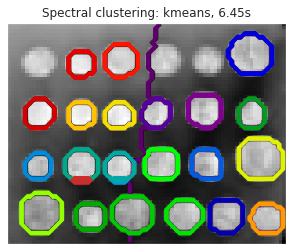

In [ ]:
N_REGIONS = 25

t0 = time.time()
labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels='kmeans', random_state=10)
t1 = time.time()
labels = labels.reshape(rescaled_coins.shape)

plt.figure(figsize=(5, 5))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
for l in range(N_REGIONS):
    plt.contour(labels == l,colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
plt.xticks(())
plt.yticks(())
title = 'Spectral clustering: %s, %.2fs' % ('kmeans', (t1 - t0))
print(title)
plt.title(title)
plt.show()

## 6 t-SNE


### t-SNE basics

The idea of t-SNE is to convert affinities/closeness of data points to probabilities. It assumes that 
> $P_1$(The edge between $i$ and $j$ are selected in the original feature space in an edge sampling process) $\approx P_2$(The edge between $i$ and $j$ are selected in the projection space in an edge sampling process)

Both $P_1 = f_1(\text{closeness}(\mathbf{x}^i,\mathbf{x}^j))$ and $P_2 = f_2(\text{closeness}(\mathbf{y}^i,\mathbf{y}^j))$ are functions of the closeness of data points but have different forms. $f_1$ is built from the Gaussian distribution, while $f_2$ is built from the **Student’s t-distribution**. Finally, **Kullback–Leibler (KL) divergence** is used to calculate the difference between $P_1$ and $P_2$ on all edges. And $\mathbf{y}^i$s are generated by minimizing this KL divergence.




Since the t-distribution has a heavier tail than the Gaussian distribution,
the usage of t-distribution allows t-SNE to be particularly sensitive to local structures in the original feature space and has a few other advantages over existing techniques:


1. Reveal the structure at many scales on a single map;

2. Reveal data that lie in multiple, different, manifolds or clusters;

3. Reduce the tendency to crowd points together at the center.



## 7 Hands-on Exercise



### Example: Handwritten numbers dataset

Handwritten numbers dataset collects a group of images of the hand written numbers from 1 to 10. Each image fits in an 8$\times$8 pixel box, with the grey level of each pixel recorded in a 8$\times$8 data matrix. Every matrix is flattened into a vector of 64 numbers, so we have 64 features in this dataset.


We use this example to show that t-SNE gives better dimensionality reduction results than other methods when the number of projected features is small (usually 2 or 3). As a result, t-SNE is a popular method to visualize high-dimensional data.


We construct the two-dimensional projected features using PCA, LLE, and t-SNE respectively, and draw a scatter plot of images according to each of them.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()  ## load data

There are 1797 observations in this dataset.

In [ ]:
from sklearn.decomposition import PCA
from sklearn import manifold

# PCA
pca = PCA(n_components=2)  
PCA_projected = pca.fit_transform(digits.data)

# LLE
LLE_projected, err = manifold.locally_linear_embedding(digits.data, n_neighbors=12,
                                             n_components=2)

# TSNE
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
TSNE_projected = tsne.fit_transform(digits.data)


In the above code, we see that the 'init' parameter of TSNE is 'pca'. Usually, when we apply a nonlinear dimensionality reduction method, we first use PCA (or another linear dimensional reduction method) to reduce the method to a $r^*$-dimensional space that $r \leq r^* < d$. This step can help improve the performance of nonlinear dimensionality reduction methods and make more stable results. The reason comes from two aspects. First, the selected first $r^*$th PCs could contain most of the variance of the original data. The remaining part of variance usually contains a lot of noise and is not useful. Second, the PCs are orthogonal to each other, and using PCA can avoid multicollinearity in the original data.

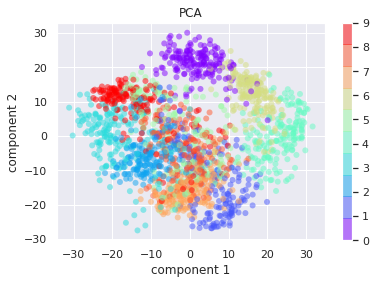

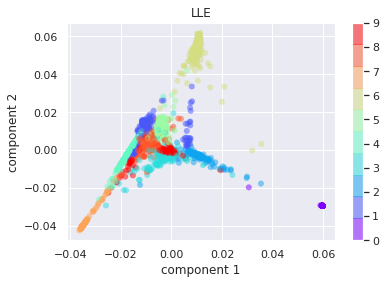

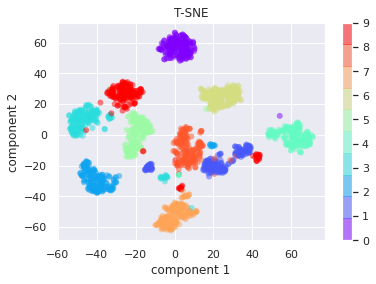

In [ ]:
## draw plots
def draw_components(Y_projected, title):
    plt.scatter(Y_projected[:, 0], Y_projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('rainbow', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.title(title)

    plt.colorbar();

draw_components(PCA_projected, 'PCA')
plt.show()
draw_components(LLE_projected, 'LLE')
plt.show()
draw_components(TSNE_projected, 'T-SNE')
plt.show()


We observe that T-SNE can separate the images with different numbers best.

We now cluster all images into 10 groups and expect that each group contains one of numbers from 1 to 10. We compare the clustering results of k-means methods built on the original 64 features and the two-dimensional features constructed by different dimensionality reduction methods respectively. With the true labels of numbers, we use the ARI metric to evaluate their clustering results.

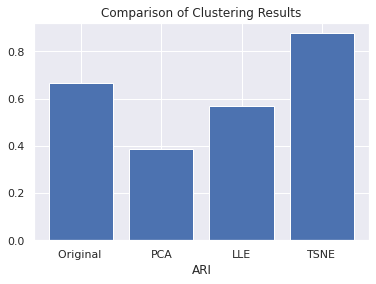

In [ ]:
# For k-means with original features
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# "random_state=100" is to set a random number.
cluster_ori = KMeans(n_clusters=10,random_state=100).fit_predict(digits.data)

cluster_PCA = KMeans(n_clusters=10,random_state=100).fit_predict(PCA_projected)

cluster_LLE = KMeans(n_clusters=10,random_state=100).fit_predict(LLE_projected)

cluster_TSNE = KMeans(n_clusters=10,random_state=100).fit_predict(TSNE_projected)


# caluclate ARI of different mehtods
ari_ori = metrics.adjusted_rand_score(digits.target, cluster_ori)
ari_PCA = metrics.adjusted_rand_score(digits.target, cluster_PCA)
ari_LLE = metrics.adjusted_rand_score(digits.target, cluster_LLE)
ari_TSNE = metrics.adjusted_rand_score(digits.target, cluster_TSNE)

# Compare the results
name_list = ['Original ','PCA','LLE','TSNE']
num_list = [ari_ori,ari_PCA,ari_LLE,ari_TSNE]
plt.bar(range(len(num_list)), num_list, color = "b",tick_label=name_list)
plt.xlabel("ARI")
plt.title("Comparison of Clustering Results")
plt.show()


We can see that for this dataset, TSNE performs much better than other methods in clustering the images.


# Questions? 


In [ ]:
Image(url= "https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png", width=100)
